In [2]:
from urllib.request import urlopen
import bs4
import requests
from lxml import html
from lxml.cssselect import CSSSelector
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
bills = []
xml_range = range(1,200)

## POLICY AREA

In [5]:
for i in xml_range:
    url = 'https://www.govinfo.gov/bulkdata/BILLSTATUS/115/hr/BILLSTATUS-115hr' + str(i) + '.xml'
    source = requests.get(url)
    ntree = html.document_fromstring(source.content)
    text = ntree.xpath('//billsubjects/policyarea/name/text()')
    bills.append(text)

In [6]:
print(bills)

[['Taxation'], ['Agriculture and Food'], [], ['Transportation and Public Works'], ['Government Operations and Politics'], [], ['Civil Rights and Liberties, Minority Issues'], [], [], ['Finance and Financial Sector'], [], ['Government Operations and Politics'], [], [], ['Labor and Employment'], [], [], [], ['Arts, Culture, Religion'], ['Government Operations and Politics'], ['Government Operations and Politics'], ['Emergency Management'], ['Water Resources Development'], ['Finance and Financial Sector'], ['Taxation'], ['Government Operations and Politics'], ['Armed Forces and National Security'], ['Armed Forces and National Security'], ['Taxation'], ['Taxation'], ['Government Operations and Politics'], ['Taxation'], ['Government Operations and Politics'], ['Crime and Law Enforcement'], ['Taxation'], ['Crime and Law Enforcement'], ['Crime and Law Enforcement'], ['Crime and Law Enforcement'], ['Government Operations and Politics'], ['Civil Rights and Liberties, Minority Issues'], ['Govern

In [7]:
policyarea = pd.DataFrame({'policyarea':bills})
policyarea['policyarea'] = policyarea['policyarea'].astype(str)
policyarea['policyarea'] = policyarea['policyarea'].str.replace('[','')
policyarea['policyarea'] = policyarea['policyarea'].str.replace(']','')
policyarea['policyarea'] = policyarea['policyarea'].str.replace("'","")

In [8]:
policyarea.policyarea

0                                         Taxation
1                             Agriculture and Food
2                                                 
3                  Transportation and Public Works
4               Government Operations and Politics
5                                                 
6      Civil Rights and Liberties, Minority Issues
7                                                 
8                                                 
9                     Finance and Financial Sector
10                                                
11              Government Operations and Politics
12                                                
13                                                
14                            Labor and Employment
15                                                
16                                                
17                                                
18                         Arts, Culture, Religion
19              Government Oper

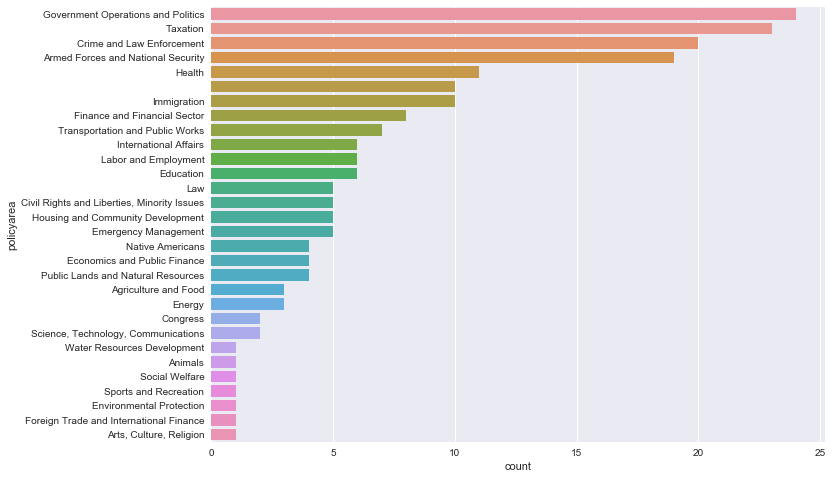

In [18]:
sns.countplot(y = "policyarea", data = policyarea, order = policyarea['policyarea'].value_counts().index, 
              label = 'big')
sns.set(rc={'figure.figsize':(11,9)})

## BILL SPONSOR

In [95]:
xml_range = range(1,100)
sponsor = []
policyarea = []
party = []
state = []

In [96]:
for i in xml_range:
    url = 'https://www.govinfo.gov/bulkdata/BILLSTATUS/115/hr/BILLSTATUS-115hr' + str(i) + '.xml'
    source = requests.get(url)
    ntree = html.document_fromstring(source.content)
    policyarea_text = ntree.xpath('//bill/policyarea/name/text()')
    policyarea.append(policyarea_text)
    sponsor_text = ntree.xpath('//bill/sponsors/item/fullname/text()')
    sponsor.append(sponsor_text)
    party_text = ntree.xpath('//bill/sponsors/item/party/text()')
    party.append(party_text)
    state_text = ntree.xpath('//bill/sponsors/item/state/text()')
    state.append(state_text)

In [132]:
billdf = pd.DataFrame({'policyarea':policyarea, 'sponsor':sponsor, 'party':party, 'state':state})

In [133]:
billdf

party                                     policyarea  \
0    [R]                                     [Taxation]   
1    [R]                         [Agriculture and Food]   
2     []                                             []   
3    [R]              [Transportation and Public Works]   
4    [R]           [Government Operations and Politics]   
5     []                                             []   
6    [R]  [Civil Rights and Liberties, Minority Issues]   
7     []                                             []   
8     []                                             []   
9    [R]                 [Finance and Financial Sector]   
10    []                                             []   
11   [D]           [Government Operations and Politics]   
12    []                                             []   
13    []                                             []   
14   [D]                         [Labor and Employment]   
15    []                                             []   
16    []                                             []   
17    []                                             []   
18   [D]                      [Arts, Culture, Religion]   
19   [D]           [Government Operations and Politics]   
20   [R]           [Government Operations and Politics]   
21   [R]                         [Emergency Management]   
22   [R]                  [Water Resources Development]   
23   [R]                 [Finance and Financial Sector]   
24   [R]                                     [Taxation]   
25   [R]           [Government Operations and Politics]   
26   [R]           [Armed Forces and National Security]   
27   [R]           [Armed Forces and National Security]   
28   [R]                                     [Taxation]   
29   [R]                                     [Taxation]   
..   ...                                            ...   
69   [D]           [Government Operations and Politics]   
70   [R]           [Government Operations and Politics]   
71   [R]           [Government Operations and Politics]   
72   [R]           [Government Operations and Politics]   
73   [R]           [Government Operations and Politics]   
74   [R]           [Government Operations and Politics]   
75   [R]           [Government Operations and Politics]   
76   [R]           [Government Operations and Politics]   
77   [R]                 [Finance and Financial Sector]   
78   [R]                 [Finance and Financial Sector]   
79   [R]                                  [Immigration]   
80   [R]                                  [Immigration]   
81   [R]                        [International Affairs]   
82   [R]                                  [Immigration]   
83   [R]                    [Crime and Law Enforcement]   
84   [R]                 [Economics and Public Finance]   
85   [R]                 [Economics and Public Finance]   
86   [R]                 [Economics and Public Finance]   
87   [R]           [Public Lands and Natural Resources]   
88   [R]            [Housing and Community Development]   
89   [D]           [Armed Forces and National Security]   
90   [D]           [Armed Forces and National Security]   
91   [D]           [Armed Forces and National Security]   
92   [D]           [Armed Forces and National Security]   
93   [D]           [Armed Forces and National Security]   
94   [D]           [Armed Forces and National Security]   
95   [D]              [Transportation and Public Works]   
96   [D]                                     [Congress]   
97   [D]  [Civil Rights and Liberties, Minority Issues]   
98   [D]              [Transportation and Public Works]   

                                     sponsor state  
0               [Rep. Brady, Kevin [R-TX-8]]  [TX]  
1       [Rep. Conaway, K. Michael [R-TX-11]]  [TX]  
2                                         []    []  
3              [Rep. Shuster, Bill [R-PA-9]]  [PA]  
4             [Rep. Goodlatte, Bob [R-VA-6]]  [VA]  
5                         

In [134]:
billdf['policyarea'] = billdf['policyarea'].astype(str)
billdf['policyarea'] = billdf['policyarea'].str.replace('[','')
billdf['policyarea'] = billdf['policyarea'].str.replace(']','')
billdf['policyarea'] = billdf['policyarea'].str.replace("'","")

billdf['sponsor'] = billdf['sponsor'].astype(str)
billdf['sponsor'] = billdf['sponsor'].str.replace('[','')
billdf['sponsor'] = billdf['sponsor'].str.replace(']','')
billdf['sponsor'] = billdf['sponsor'].str.replace("'","")

billdf['party'] = billdf['party'].astype(str)
billdf['party'] = billdf['party'].str.replace('[','')
billdf['party'] = billdf['party'].str.replace(']','')
billdf['party'] = billdf['party'].str.replace("'","")

billdf['state'] = billdf['state'].astype(str)
billdf['state'] = billdf['state'].str.replace('[','')
billdf['state'] = billdf['state'].str.replace(']','')
billdf['state'] = billdf['state'].str.replace("'","")

In [135]:
billdf = billdf.replace('', np.nan)

In [136]:
billdf.dropna(thresh=2)

party                                   policyarea  \
0      R                                     Taxation   
1      R                         Agriculture and Food   
3      R              Transportation and Public Works   
4      R           Government Operations and Politics   
6      R  Civil Rights and Liberties, Minority Issues   
9      R                 Finance and Financial Sector   
11     D           Government Operations and Politics   
14     D                         Labor and Employment   
18     D                      Arts, Culture, Religion   
19     D           Government Operations and Politics   
20     R           Government Operations and Politics   
21     R                         Emergency Management   
22     R                  Water Resources Development   
23     R                 Finance and Financial Sector   
24     R                                     Taxation   
25     R           Government Operations and Politics   
26     R           Armed Forces and National Security   
27     R           Armed Forces and National Security   
28     R                                     Taxation   
29     R                                     Taxation   
30     R           Government Operations and Politics   
31     R                                     Taxation   
32     R           Government Operations and Politics   
33     R                    Crime and Law Enforcement   
34     R                                     Taxation   
35     R                    Crime and Law Enforcement   
36     R                    Crime and Law Enforcement   
37     R                    Crime and Law Enforcement   
38     R           Government Operations and Politics   
39     D  Civil Rights and Liberties, Minority Issues   
..   ...                                          ...   
69     D           Government Operations and Politics   
70     R           Government Operations and Politics   
71     R           Government Operations and Politics   
72     R           Government Operations and Politics   
73     R           Government Operations and Politics   
74     R           Government Operations and Politics   
75     R           Government Operations and Politics   
76     R           Government Operations and Politics   
77     R                 Finance and Financial Sector   
78     R                 Finance and Financial Sector   
79     R                                  Immigration   
80     R                                  Immigration   
81     R                        International Affairs   
82     R                                  Immigration   
83     R                    Crime and Law Enforcement   
84     R                 Economics and Public Finance   
85     R                 Economics and Public Finance   
86     R                 Economics and Public Finance   
87     R           Public Lands and Natural Resources   
88     R            Housing and Community Development   
89     D           Armed Forces and National Security   
90     D           Armed Forces and National Security   
91     D           Armed Forces and National Security   
92     D           Armed Forces and National Security   
93     D           Armed Forces and National Security   
94     D           Armed Forces and National Security   
95     D              Transportation and Public Works   
96     D                                     Congress   
97     D  Civil Rights and Liberties, Minority Issues   
98     D              Transportation and Public Works   

                                 sponsor state  
0               Rep. Brady, Kevin R-TX-8    TX  
1       Rep. Conaway, K. Michael R-TX-11    TX  
3              Rep. Shuster, Bill R-PA-9    PA  
4             Rep. Goodlatte, Bob R-VA-6    VA  
6      Rep. Smith, Christopher H. R-NJ-4    NJ  
9            Rep. Hensarling, Jeb R-TX-5    TX  
11               Rep. Lewis, John D-GA-5    GA  
14  Rep. Scott, Robert C. "Bobby" D-VA-3    VA  
18      Rep. Maloney, Carol

In [161]:
billdf.d = []
billdf.d = [l for l in party if l == 'D']

In [162]:
billdf

party                                   policyarea  \
0      R                                     Taxation   
1      R                         Agriculture and Food   
2    NaN                                          NaN   
3      R              Transportation and Public Works   
4      R           Government Operations and Politics   
5    NaN                                          NaN   
6      R  Civil Rights and Liberties, Minority Issues   
7    NaN                                          NaN   
8    NaN                                          NaN   
9      R                 Finance and Financial Sector   
10   NaN                                          NaN   
11     D           Government Operations and Politics   
12   NaN                                          NaN   
13   NaN                                          NaN   
14     D                         Labor and Employment   
15   NaN                                          NaN   
16   NaN                                          NaN   
17   NaN                                          NaN   
18     D                      Arts, Culture, Religion   
19     D           Government Operations and Politics   
20     R           Government Operations and Politics   
21     R                         Emergency Management   
22     R                  Water Resources Development   
23     R                 Finance and Financial Sector   
24     R                                     Taxation   
25     R           Government Operations and Politics   
26     R           Armed Forces and National Security   
27     R           Armed Forces and National Security   
28     R                                     Taxation   
29     R                                     Taxation   
..   ...                                          ...   
69     D           Government Operations and Politics   
70     R           Government Operations and Politics   
71     R           Government Operations and Politics   
72     R           Government Operations and Politics   
73     R           Government Operations and Politics   
74     R           Government Operations and Politics   
75     R           Government Operations and Politics   
76     R           Government Operations and Politics   
77     R                 Finance and Financial Sector   
78     R                 Finance and Financial Sector   
79     R                                  Immigration   
80     R                                  Immigration   
81     R                        International Affairs   
82     R                                  Immigration   
83     R                    Crime and Law Enforcement   
84     R                 Economics and Public Finance   
85     R                 Economics and Public Finance   
86     R                 Economics and Public Finance   
87     R           Public Lands and Natural Resources   
88     R            Housing and Community Development   
89     D           Armed Forces and National Security   
90     D           Armed Forces and National Security   
91     D           Armed Forces and National Security   
92     D           Armed Forces and National Security   
93     D           Armed Forces and National Security   
94     D           Armed Forces and National Security   
95     D              Transportation and Public Works   
96     D                                     Congress   
97     D  Civil Rights and Liberties, Minority Issues   
98     D              Transportation and Public Works   

                                 sponsor state  
0               Rep. Brady, Kevin R-TX-8    TX  
1       Rep. Conaway, K. Michael R-TX-11    TX  
2                                    NaN   NaN  
3              Rep. Shuster, Bill R-PA-9    PA  
4             Rep. Goodlatte, Bob R-VA-6    VA  
5                                    NaN   NaN  
6      Rep. Smith, Christopher H. R-NJ-4    NJ  
7                                    NaN   NaN  
8                          

In [156]:
billdf.groupby('state')[['party']].count()

party
state       
AK         1
AZ         3
CA        14
GA         6
IA         1
IL         1
KY         2
MD         1
MI         2
MO         3
NC         5
NJ         1
NY         2
OH         2
OK         4
PA         4
TN         7
TX        26
VA         4

In [143]:
billdf.groupby('policyarea')[['state', 'party']].count()

state  party
policyarea                                               
Agriculture and Food                             2      2
Armed Forces and National Security              10     10
Arts, Culture, Religion                          1      1
Civil Rights and Liberties, Minority Issues      3      3
Congress                                         1      1
Crime and Law Enforcement                       13     13
Economics and Public Finance                     3      3
Education                                        2      2
Emergency Management                             4      4
Energy                                           1      1
Finance and Financial Sector                     4      4
Government Operations and Politics              20     20
Housing and Community Development                1      1
Immigration                                      4      4
International Affairs                            2      2
Labor and Employment                             2      2
Public Lands and Natural Resources               2      2
Social Welfare                                   1      1
Sports and Recreation                            1      1
Taxation                                         7      7
Transportation and Public Works                  4      4
Water Resources Development                      1      1

In [102]:
billdf.groupby('policyarea')

In [137]:
billdf[billdf['policyarea'] == 'Taxation']

party policyarea                           sponsor state
0      R   Taxation          Rep. Brady, Kevin R-TX-8    TX
24     R   Taxation          Rep. Woodall, Rob R-GA-7    GA
28     R   Taxation        Rep. Goodlatte, Bob R-VA-6    VA
29     R   Taxation       Rep. Hudson, Richard R-NC-8    NC
31     R   Taxation       Rep. Hudson, Richard R-NC-8    NC
34     R   Taxation  Rep. Burgess, Michael C. R-TX-26    TX
62     D   Taxation  Rep. Jackson Lee, Sheila D-TX-18    TX

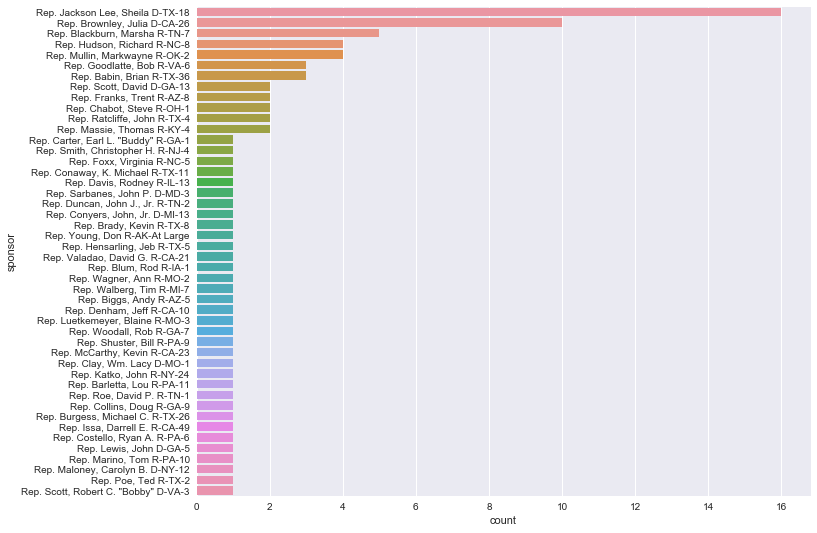

In [139]:
sns.countplot(y = "sponsor", data = billdf, order = billdf['sponsor'].value_counts().index, 
              label = 'big')
sns.set(rc={'figure.figsize':(12,9)})

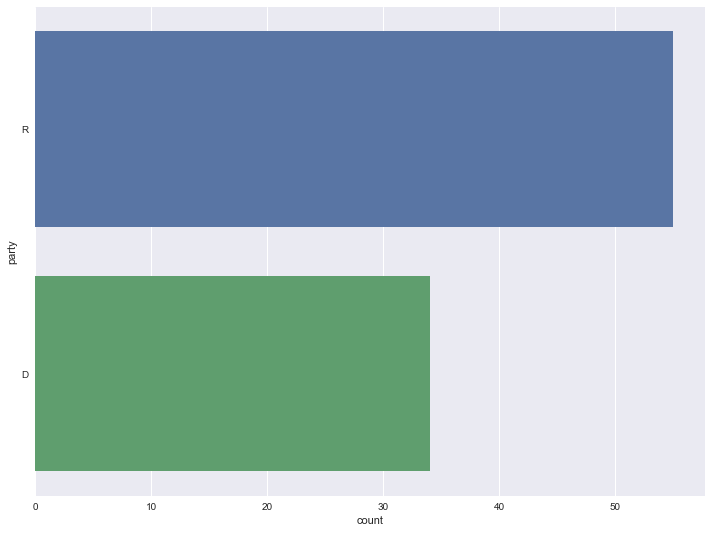

In [140]:
sns.countplot(y = "party", data = billdf, order = billdf['party'].value_counts().index, 
              label = 'big')
sns.set(rc={'figure.figsize':(11,3)})

In [111]:
# Plot the total bills
sns.set_color_codes("pastel")
sns.barplot(x="policyarea", y="state", data=billdf, kind="count", label="Total", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="party", y="state", data=billdf, kind="count", label="Party", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 24), ylabel="",
       xlabel="Automobile collisions per billion miles")
sns.despine(left=True, bottom=True)

ValueError: Neither the `x` nor `y` variable appears to be numeric.